In [94]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.model_selection import GridSearchCV 

In [155]:
x_train = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\ScaledTrainSet_data.csv' , index_col  = 'index')
x_train

,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,is_דודג',...,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
1608,0.952381,0,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.645547,0.764326,1,0,0,0
1329,0.761905,0,0,0,0,0,0,0,0,0,...,0,0,1,0.166667,0.188003,0.600759,0,0,0,1
1782,0.333333,0,0,0,0,0,0,0,0,0,...,0,0,1,0.166667,0.050377,0.652751,0,0,0,1
1193,0.523810,0,0,0,0,0,0,0,0,0,...,1,0,0,0.583333,0.027266,0.493359,0,1,0,0
1166,1.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,0.833333,1.000000,0.489943,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,0.809524,0,0,0,0,0,0,0,0,0,...,0,0,1,0.333333,0.122825,0.518027,0,1,0,0
1100,0.428571,0,0,0,0,0,0,0,0,0,...,0,0,1,0.416667,0.142041,0.813283,1,0,0,0
1135,0.714286,0,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.295767,0.675522,0,0,0,1


In [156]:
x_target = pd.read_csv(r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TrainSet-target_data.csv' , index_col='index' )
x_target

,price
index,
1608,239000
1329,69900
1782,100000
1193,33000
1166,437320
...,...
1650,75000
1100,29000
1135,110000


In [157]:
min_max_scaler = MinMaxScaler()
scaledtarget = x_target.copy()
scaledtarget[["price"]] = min_max_scaler.fit_transform(scaledtarget[["price"]])
scaledtarget

,price
index,
1608,0.467347
1329,0.122245
1782,0.183673
1193,0.046939
1166,0.872082
...,...
1650,0.132653
1100,0.038776
1135,0.204082


In [538]:
#  ע"מ לנרמל גם את עמודת המחירים של הטריין השתמשנו בפונקציה הזו 

lab_enc = preprocessing.LabelEncoder()
x_target = lab_enc.fit_transform(x_target)
#print(utils.multiclass.type_of_target(x_target)) 

# או זו:

min_max_scaler = MinMaxScaler()
scaledtarget = x_target.copy()
scaledtarget[["price"]] = min_max_scaler.fit_transform(scaledtarget[["price"]])

# Cross-validation :

first we return the demi-model (the average) and try to be better than him.... 

In [98]:
 # בדיקת מודל אפס: 

def targetTransform(len_target):
    target_ = np.zeros(len_target)
    for i in range (len_target):
        target_[i] +=  x_target.mean()
    return target_

x_train1 , x_test1 , y_train1 , y_test1= sklearn.model_selection.train_test_split(x_train, scaledtarget , test_size=0.1 , random_state = 2) 

pred = targetTransform(len(y_test1))
#print (f"\n{pred}")
print (f"RMSE: {np.sqrt(mean_squared_error(y_test1 , pred))}")

#במידה והמודל היה מחזיר תמיד את ממוצע מחיר הרכבים בטבלה זו הייתה מידת הדיוק שלו
# מדוייק יותר- כרגע הגענו למרחק הממוצע מחיזוי נכון בשקלים.

#29915.4789509615 = 0.8733269871229924
# 104849.11159023042 = פי 3.5 פחות טוב = 0.2491767949
print ("accuracy :" , 0.2491767949)

RMSE: 104849.11159023042
accuracy : 0.2491767949


In [540]:
#Dummy-model method:
    #Checking the prices mean, and then its percent.
    #Count the prices that between (price+percent) and (price-percent), duo the price is a spesific number (10+ digits)
    #Divide those counted prices by the amount of prices.

x_target.mean() # 0.19357003724451638
x_target.mean()/100 # 0.0019357003724451637

maxLim = x_target.mean() + x_target.mean()/100
minLim = x_target.mean() - x_target.mean()/100
counter = x_target.where(x_target > minLim).where(x_target < maxLim).dropna().count()
print ("accuracy:" , (float)(counter / x_target.count()))
#וזה אחוז הדיוק שאנחנו צריכים להיות מעליו

accuracy: 0.015706806282722512


אפשר לראות שאם נשתמש ב"מודל אפס" שמחזיר פשוט את הממוצע של המחירים בטבלה
הטעות חמורה בהרבה מאשר במודל שלנו 

## select and train a model

# Linear Regression model

In [97]:
#את הדאטה שהקדשנו לטריין אנחנו מפצלים שוב ע"מ לבחון את מודל הרגרסיה הלינארית עם רנדום אחר

x_train1 , x_test1 , y_train1 , y_test1= sklearn.model_selection.train_test_split(x_train, scaledtarget , test_size=0.2 , random_state = 2) 

lin_reg =  LinearRegression()
fit1= lin_reg.fit(x_train1, y_train1)

pred = fit1.predict(x_test1)
#print (f"\n{pred}")
print (f"RMSA: {np.sqrt(mean_squared_error(y_test1 , pred))}\n")

print ("score:" , lin_reg.score( x_test1, y_test1))


RMSA: 0.061049364461006554

score: 0.8733379146368712



לפני כן הדיוק היה די גרוע, ניסינו להבין למה לא הצלחנו לחזות טוב עם המודל שלנו... עברנו על המכוניות ידנית וראינו באילו מכוניות הטעויות הגדולות קרו
החלטנו למחוק את הדוגמאות הקיצוניות וקיבלנו שיפור עצום

In [123]:
def display_scores(scores):
    print ("scores:",  scores)
    print("Mean:" , scores.mean() )
    print ("Standard deviation:" , scores.std()) 
    
x_train4 , x_test4 , y_train4 , y_test4= sklearn.model_selection.train_test_split(x_train, np.ravel(scaledtarget, order = 'C') , test_size=0.2 , random_state = 4)   
predictions = lin_reg.predict(x_test4)

print (f"RMSA: {np.sqrt(mean_squared_error(y_test4 , predictions))}\n")

print ("score:" , lin_reg.score(x_test4 , y_test4))


RMSA: 0.058536840831978125

score: 0.8939026591790277


In [102]:
#This method check which cv gives the best score.
    #if we make this one a function -> the function will return the bestCV
CV_COUNT = 100
maxScore = 0
bestCV = 0
bestScoreI = 0
scr = np.zeros(CV_COUNT)

for i in np.arange(2, CV_COUNT+2):
    bestScoreI = 0
    ind = cross_val_score(lin_reg, x_train, x_target, cv=i, scoring = "r2")
    for j in ind:
        if j > maxScore:
            maxScore = j
            bestCV = i
        if j > bestScoreI:
            scr[i-2] = pow(j, 2)    
    
print("r =", maxScore)
print("r^2 =", pow(maxScore, 2))
print("for cv =", bestCV)
#print(scr)
#print (cross_val_score(lin_reg, x_train, x_target, cv=14)) #a method to print scores by cv.

r = 0.9740470477033635
r^2 = 0.9487676511396385
for cv = 77


In [ ]:
#We got an excellent score for cv = 77. We will try to keep this model.

In [551]:
m = 0
whatCV = 0

for i in np.arange(2, 40):
    ind = cross_val_score(lin_reg, x_train, x_target, cv=i)
    for j in ind:
        if j > m:
            m = j
            whatCV = i
    
print(m)
print("for cv=", i)
# cv=39 זהו ההיפר משתנה הכי טוב שלנו ברגרסיה ליניארית

0.9545137277864899
for cv= 39


In [218]:
predictions = lin_reg.predict(x_test1)

Text(0, 0.5, 'Predicted Y')

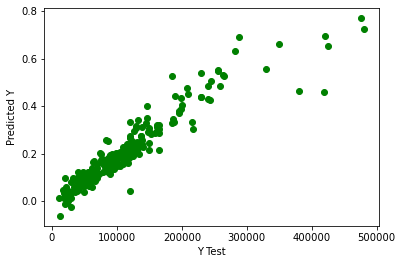

In [224]:
# Create a scatterplot of the real test values versus the predicted values.
plt.scatter(y_test1 , predictions , color = "green")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
אפשר לראות שהצלחנו לנבא את התוצאות במחירים הנמוכים הכי טוב ואחרי מחיר מסויים המודל לא מצליח לחזות נכון את המחיר.
אנחנו מניחים שהסיבה היא שאין הרבה דוגמאות במחירים הקיצוניים ולכן המחשב לא יודע לחזות אותם.

# DecisionTreeRegressor model

In [127]:
x_train1 , x_test1 , y_train1 , y_test1= sklearn.model_selection.train_test_split(x_train, np.ravel(x_target, order = 'C') , test_size=0.1 , random_state = 2) 


tree_reg =  DecisionTreeRegressor()
fit1 = tree_reg.fit(x_train1 , y_train1)
pred = fit1.predict(x_test1)
#print (f"\n{pred}")
print (f"RMSA: {np.sqrt(mean_squared_error(y_test1 , pred))}\n")
print ("score:" , tree_reg.score(x_test1 , y_test1))

RMSA: 34912.28405445931

score: 0.7963815171800055


# Fine Tune our Model

#  gridsearch for Linear Regression:


In [217]:
param_grid_LR =  [  { 'copy_X': [True , False] , 'n_jobs' : [1 ,-1] , 'normalize' : [False, True] } ]

grid_search = GridSearchCV(estimator = lin_reg , param_grid = param_grid_LR , cv = 3,
                                   scoring = 'neg_mean_squared_error' )
grid_search.fit(x_train, np.ravel(x_target, order = 'C'))
grid_search.best_params_
grid_search.best_score_
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"] ,cvres["params"] ):
    print (np.sqrt(-mean_score) , params)
    
#every score is exactly the same...

5017606921580066.0 {'copy_X': True, 'n_jobs': 1, 'normalize': False}
8.170502291100586e+16 {'copy_X': True, 'n_jobs': 1, 'normalize': True}
5017606921580066.0 {'copy_X': True, 'n_jobs': -1, 'normalize': False}
8.170502291100586e+16 {'copy_X': True, 'n_jobs': -1, 'normalize': True}
5017606921580066.0 {'copy_X': False, 'n_jobs': 1, 'normalize': False}
8.170502291100586e+16 {'copy_X': False, 'n_jobs': 1, 'normalize': True}
5017606921580066.0 {'copy_X': False, 'n_jobs': -1, 'normalize': False}
8.170502291100586e+16 {'copy_X': False, 'n_jobs': -1, 'normalize': True}


In [208]:
# שמירה של המודל: 
LR_model =  LinearRegression()
LR_model.fit(x_train1 , y_train1)
joblib.dump(LR_model , 'Linear Regression-model_1.joblib')

#שימוש במודל קיים : 
model = joblib.load('Linear Regression-model_1.joblib')
pred = model.predict(x_test1)
model.score(x_test1 , y_test1)

0.8668913680938224

# gridsearch for svm (R):

In [196]:
#svm:
param_grid_svm = [  {'C' : [30 ,3 ,5 ,20] ,  'kernel': ['linear' , 'rbf'] } ]

grid_search = GridSearchCV(estimator = svm.SVR(gamma = 'auto') , param_grid = param_grid_svm , cv = 3,
                                   scoring = 'neg_mean_squared_error' )
grid_search.fit(x_train, np.ravel(x_target, order = 'C'))
df = pd.DataFrame(grid_search.cv_results_)
df[['param_C' , 'param_kernel' , 'mean_test_score']]



,param_C,param_kernel,mean_test_score
0,30,linear,-5.807227e+09
1,30,rbf,-6.520881e+09
2,3,linear,-6.452596e+09
3,3,rbf,-6.545426e+09
4,5,linear,-6.401873e+09
5,5,rbf,-6.543769e+09
6,20,linear,-6.021296e+09
7,20,rbf,-6.529819e+09


In [197]:
print ("best score :" , grid_search.best_score_)
print ("best params:" , grid_search.best_params_)


best score : -5807226617.14928
best params: {'C': 30, 'kernel': 'linear'}


In [198]:
#evaluation scores:
cvres = grid_search.cv_results_
for mean_score , params in zip(cvres["mean_test_score"] ,cvres["params"] ):
    print (np.sqrt(-mean_score) , params)


76205.16135505048 {'C': 30, 'kernel': 'linear'}
80751.97338242625 {'C': 30, 'kernel': 'rbf'}
80328.052826528 {'C': 3, 'kernel': 'linear'}
80903.80928044878 {'C': 3, 'kernel': 'rbf'}
80011.7051974721 {'C': 5, 'kernel': 'linear'}
80893.56832345125 {'C': 5, 'kernel': 'rbf'}
77597.00859041025 {'C': 20, 'kernel': 'linear'}
80807.29254451802 {'C': 20, 'kernel': 'rbf'}


here we obtain the best solution by setting the 'C' parameter to 30 and the 'kernel' to 'linear'.

In [205]:
param_grid_svm = [{'C': [40, 2 ,8 ,30] ,  'kernel': ['linear']}]

clf = svm.SVC()

grid_ = GridSearchCV(estimator=clf, param_grid = param_grid_svm, cv = 5, n_jobs=-1)
grid_.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_.best_params_)

C:\Users\avoav\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=30, kernel='linear')

 The best score across ALL searched params:
 0.03366127514281336

 The best parameters across ALL searched params:
 {'C': 30, 'kernel': 'linear'}


#  gridsearch for tree Regressor:


In [209]:
param_grid_DT = [{'splitter' : ['best' , "random"] , 'max_features':[10, 15 ,20 , 40] , 'min_samples_split': [2 , 3 , 5, 15], }
                ]
grid_search = GridSearchCV(estimator= tree_reg ,param_grid = param_grid_DT , cv = 3,
                                   scoring = 'neg_mean_squared_error' , return_train_score = False)
grid_search.fit(x_train, np.ravel(x_target, order = 'C'))
df = pd.DataFrame(grid_search.cv_results_)

df[['param_max_features' , 'param_min_samples_split' , 'param_splitter' , 'params' , 'mean_test_score']]

print ("best score :" , grid_search.best_score_)
print ("best params:" , grid_search.best_params_)


best score : -942759299.07934
best params: {'max_features': 40, 'min_samples_split': 15, 'splitter': 'random'}


In [210]:
# שמירה של המודל: 
tree_model =  DecisionTreeRegressor()
tree_model.fit(x_train1 , y_train1 )
joblib.dump(tree_model , 'tree-model_1.joblib')

#שימוש במודל קיים : 
model = joblib.load('tree-model_1.joblib')
pred = model.predict(x_test1)
model.score(x_test1 , y_test1)

0.7462468420421604

## found the best classifier and hiperparameters , for the two models

In [211]:
X_train, X_test, y_train, y_test = train_test_split(x_train, np.ravel(x_target, order = 'C') , test_size=0.20, random_state=4)

names = ["Decision Tree", "Linear Regression"]

param_grid_DT = [{'splitter' : ['best' , "random"] , 'max_features':[2 , 10 ,20] , 'min_samples_split': [2 , 3 , 5]}
                ]
param_grid_LR =  [  { 'copy_X': [True , False] , 'n_jobs' : [1 ,-1] , 'normalize' : [False, True] } ]

classifiers = [
    DecisionTreeRegressor()
   , LinearRegression() ]

score = 0
for name in names:
    
    if name == "Linear Regression":
        clf = LinearRegression()
        grid_search = GridSearchCV(estimator=clf, param_grid = param_grid_LR, cv = 2, n_jobs=-1)
        grid_search.fit(X_train, np.ravel(y_train, order = 'C'))
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = grid_search    
    
    elif name == "Decision Tree":
        clf = DecisionTreeRegressor()
        grid_search = GridSearchCV(estimator=clf, param_grid=param_grid_DT)
        grid_search.fit(X_train, y_train)
        if grid_search.best_score_ > score:
            score = grid_search.best_score_
            best_clf = grid_search
    
    


    print("best classifier: ",best_clf, " Accuracy= ", score)



best classifier:  GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_features': [2, 10, 20],
                          'min_samples_split': [2, 3, 5],
                          'splitter': ['best', 'random']}])  Accuracy=  0.7846257498471723
best classifier:  GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_features': [2, 10, 20],
                          'min_samples_split': [2, 3, 5],
                          'splitter': ['best', 'random']}])  Accuracy=  0.7846257498471723


svmמאיזה שהיא סיבה כאן לא רואים את הדיוק של הרגרסיה הליניארית אבל אנחנו יודעים שהיא טובה יותר משל העץ ושל ה 

# נסיון לפני הטסט:

In [191]:


LR_model =  LinearRegression()
LR_model.fit(x_train , np.ravel(scaledtarget, order = 'C'))
joblib.dump(LR_model , 'Linear Regression-model_1.joblib')


final_model =joblib.load('Linear Regression-model_1.joblib')
final_predictions = final_model.predict(x_test4)
final_mse = mean_squared_error(y_test4 , final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
final_score = final_model.score(x_test4 , y_test4)
final_score

0.8939026591790277

# Evaluate our system on the test set:

In [168]:
final_model = grid_.best_estimator_
x_test = pd.read_csv( r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet_data.csv' , index_col  = 'index')
x_test = x_test.drop(columns = ["version" , "CompanyName", "size" , "color" , "original_onership" , "engine_type" , "engine"  ] )
x_test[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" , "current_mileage"]] = min_max_scaler.fit_transform(x_test[["year", "annual_licensing_fee", "engine_size",  "next_test_in" , "car_length" ,"current_mileage"]])
x_test

,year,is_GAC,is_maserati,is_daihatsu,is_porsche,is_ds,is_smart,is_seres,is_cadillac,is_דודג',...,is_leasing,is_company,is_private,next_test_in,annual_licensing_fee,car_length,large,small,mini,medium
index,,,,,,,,,,,,,,,,,,,,,
2421,0.222222,0,0,0,0,0,0,0,0,0,...,0,0,0,0.727273,0.023759,0.229508,0,1,0,0
2891,0.666667,0,0,0,0,0,0,0,0,0,...,0,0,1,0.545455,0.633209,0.290164,0,1,0,0
2187,0.555556,0,0,0,0,0,0,0,0,0,...,1,0,0,0.909091,0.117192,0.651913,0,0,0,1
510,0.888889,0,0,0,0,0,0,0,0,0,...,0,0,1,0.181818,0.305659,0.505464,0,0,0,1
2867,0.666667,0,0,0,0,0,0,0,0,0,...,1,0,0,0.909091,0.260812,1.000000,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,0.722222,0,0,0,0,0,0,0,0,0,...,0,0,1,0.909091,0.226909,0.554645,0,0,0,1
240,0.944444,0,0,0,0,0,0,0,0,0,...,0,0,1,0.000000,0.635611,0.524590,0,0,0,1
535,0.500000,0,0,0,0,0,0,0,0,0,...,0,0,1,0.454545,0.000000,0.046448,0,0,1,0


In [226]:
y_test =  pd.read_csv( r'C:\Users\avoav\Introduction to Data Science\Project סמסטר א\project-semester-a\TestSet-target.csv' , index_col  = 'index')
y_test[["price"]] = min_max_scaler.fit_transform(y_test[["price"]])
y_test

,price
index,
2421,0.014405
2891,0.681071
2187,0.039097
510,0.252882
2867,0.251030
...,...
2602,0.192388
240,0.384773
535,0.024693


In [228]:
final_model = LinearRegression()
final_model.fit(x_train , np.ravel(scaledtarget, order = 'C'))
final_predictions = final_model.predict(x_test)
final_mse = mean_squared_error(y_test , final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
final_score = final_model.score(x_test , y_test)
print(final_score)

0.06966533333195213
0.8274103012147698


# רק מעט פחות מהציון המצופה.... 
# ועדיין הרבה יותר טוב ממודל אפס.

Text(0, 0.5, 'Predicted Y')

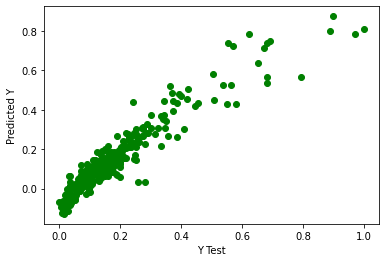

In [227]:
plt.scatter(y_test , final_predictions , color = "green")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')